## Feature Scaling - Standardizatin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        # library used for scaling the dataset

In [2]:
# feature scaling is a technique to standardize the independent features present in the data in a fixed range

""" 
2 types of feature scaling

1/ Standardization
2/ Normalization
    i/ MinMax
    ii/ Roubust scaler, etc


"""


' \n2 types of feature scaling\n\n1/ Standardization\n2/ Normalization\n    i/ MinMax\n    ii/ Roubust scaler, etc\n\n\n'

### Standardizatioin

In [3]:
# this is also called z-score Normalization

df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
302,37,137000,1
303,37,79000,1
346,53,72000,1
368,38,71000,0
326,41,72000,0


In [4]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'EstimatedSalary']], df['Purchased'], test_size=0.3, random_state=0)       # this code does the exact same thing like the above code

# df.drop('Purchased', axis=1) → stores all the columns in df and then deletes the 'Purchased' column. If you dont put axis=1, it will the delete the rows by default
# df['Purchased'] → gives the dependent variable (output/label).

x_train.shape, x_test.shape


((280, 2), (120, 2))

In [5]:
# StandardScaler

scaler = StandardScaler()

# using scaler on training data set
scaler.fit(x_train)

# transforming training and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


""" 
---- REPLACEMENT OF ABOVE CODE ----

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

"""



print(f"SCALER MEAN OF AGE AND SALARY : {scaler.mean_}")        # this is the mean of age and salary

""" 
fit() → learns the parameters (e.g., mean and standard deviation for StandardScaler) from the data.
It does not change the data.

transform() → uses the parameters already learned (from fit()) to scale or modify the data.

fit_transform() → runs both steps together: first fit(), then immediately transform() on the same data.

"""


x_train_scaled
# as you can see down below, that once the data is scaled it automatically returns data in array format, so we need to convert them into dataframe and then we can ues it properly




SCALER MEAN OF AGE AND SALARY : [3.78642857e+01 6.98071429e+04]


array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [6]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


x_train_scaled      # as you can see down below the values are scaled btwn -1 and 1
# REMEMBER while scaling a data mean, and std dev. will always be 0 and 1 of each feature


,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [7]:
print(x_train.describe().round(2))          # if you put round(2) nums will be printed in their actual format rather than being  printed in scientific format
print()
print(x_train_scaled.describe().round(2))

          Age  EstimatedSalary
count  280.00           280.00
mean    37.86         69807.14
std     10.22         34641.20
min     18.00         15000.00
25%     30.00         43000.00
50%     37.00         70500.00
75%     46.00         88000.00
max     60.00        150000.00

          Age  EstimatedSalary
count  280.00           280.00
mean     0.00             0.00
std      1.00             1.00
min     -1.95            -1.58
25%     -0.77            -0.78
50%     -0.08             0.02
75%      0.80             0.53
max      2.17             2.32


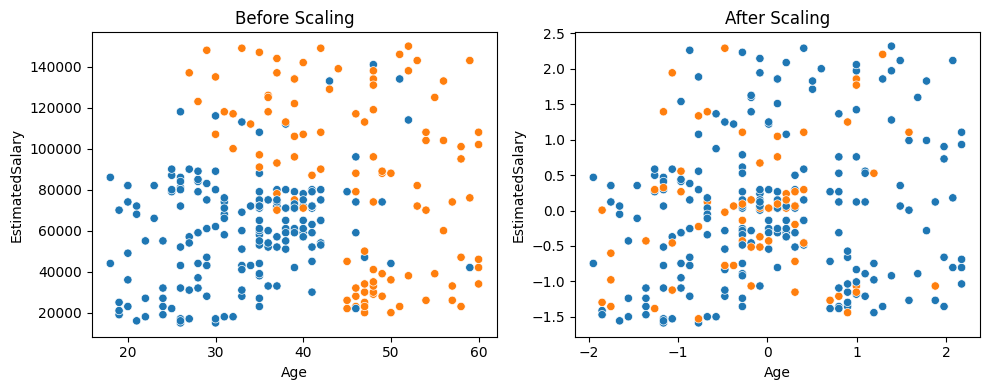

In [8]:
# effect of scaling (using subplot to print two graphs together)

# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# 1 - one row to plot the graphs
# 2 - two for to plot the two graphs as columns
# figsize=(10, 4) - Total size of the figure in inches — width = 10, height = 4
# we created fig, but never use it directly anywhere 
# Matplotlib automatically returns two things:
    # fig → the entire figure (canvas)
    # axes → the individual plot areas (subplots)

# Even if you don’t explicitly use fig, it’s still created in the background —
# because you need a figure to contain your subplots. So fig is the container, and axes are the sections within it (that holds each graphs).




# before scaling
sns.scatterplot(data=x_train, x='Age', y='EstimatedSalary', ax=axes[0], hue=df['Purchased'], legend=False)
axes[0].set_title("Before Scaling")
# ax=axes[0] --> will plot the graph in axis 0
# Purchased -- 0 (blue dot), 1 (orange dot)

# after scaling
sns.scatterplot(data=x_train_scaled, x='Age', y='EstimatedSalary', ax=axes[1], hue=df['Purchased'], legend=False)
axes[1].set_title("After Scaling")
# ax=axes[1] --> will plot the graph in axis 1


plt.tight_layout()
plt.show()

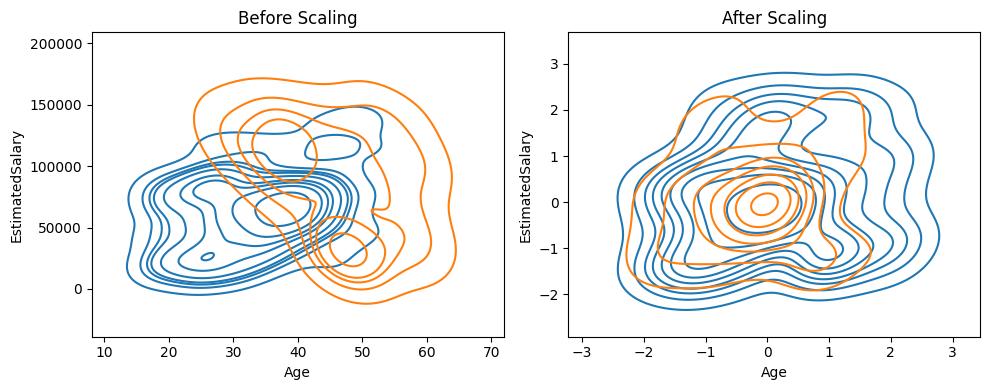

In [9]:
# using kdeplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.kdeplot(data=x_train, x='Age', y='EstimatedSalary', ax=axes[0], hue=df['Purchased'], legend=False)
axes[0].set_title("Before Scaling")
# Purchased -- 0 (blue), 1 (orange)

sns.kdeplot(data=x_train_scaled, x='Age', y='EstimatedSalary', ax=axes[1], hue=df['Purchased'], legend=False)
axes[1].set_title("After Scaling")



plt.tight_layout()
plt.show()

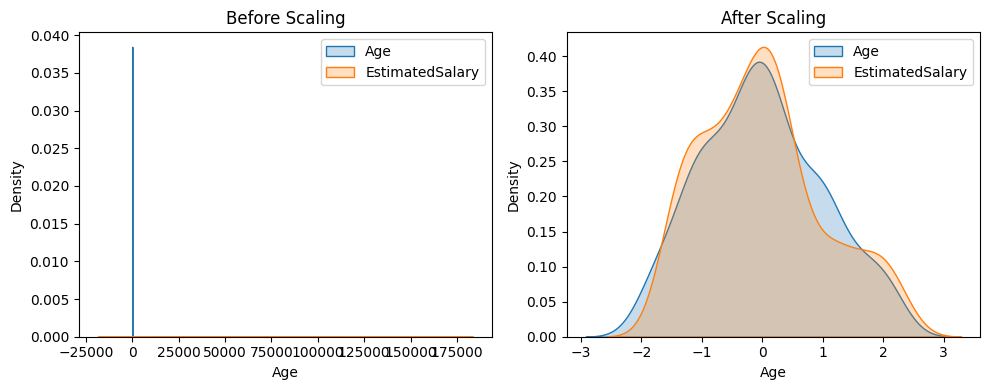

In [10]:
# effect of scaling (KDE plot comparison)
# this is a PDF (probability density function) plotting
# plotting both age and salary in x axis, you can see the difference yourself

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before scaling
sns.kdeplot(data=x_train, x='Age', ax=axes[0], fill=True, label='Age')
sns.kdeplot(data=x_train, x='EstimatedSalary', ax=axes[0], fill=True, label='EstimatedSalary')
axes[0].set_title("Before Scaling")
axes[0].legend()   # ✅ Add legend for left subplot

# After scaling
sns.kdeplot(data=x_train_scaled, x='Age', ax=axes[1], fill=True, label='Age')
sns.kdeplot(data=x_train_scaled, x='EstimatedSalary', ax=axes[1], fill=True, label='EstimatedSalary')
axes[1].set_title("After Scaling")
axes[1].legend()   # ✅ Add legend for right subplot


plt.legend()
plt.tight_layout()
plt.show()

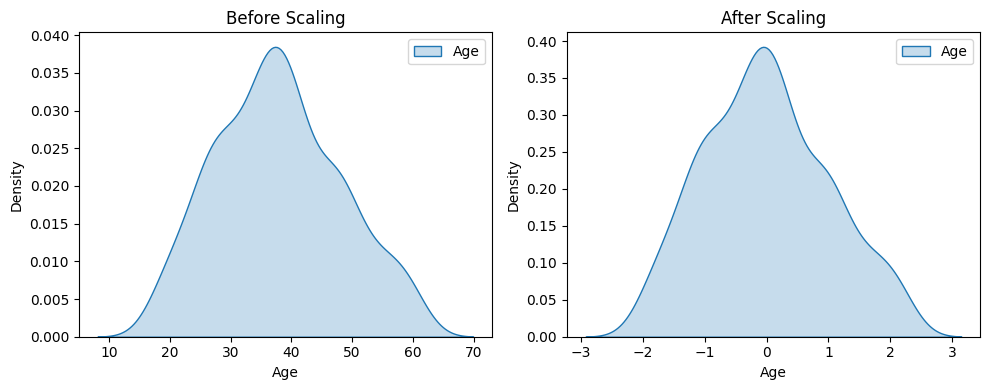

In [11]:
# making comparison of distributors
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# before scaling
sns.kdeplot(x_train['Age'], ax=axes[0], label='Age', fill=True)
axes[0].set_title("Before Scaling")
axes[0].legend()   # ✅ Add legend for left subplot

# after scaling
sns.kdeplot(x_train_scaled['Age'], ax=axes[1], label='Age', fill=True)
axes[1].set_title("After Scaling")
axes[1].legend()   # ✅ Add legend for right subplot

plt.legend()
plt.tight_layout()
plt.show()

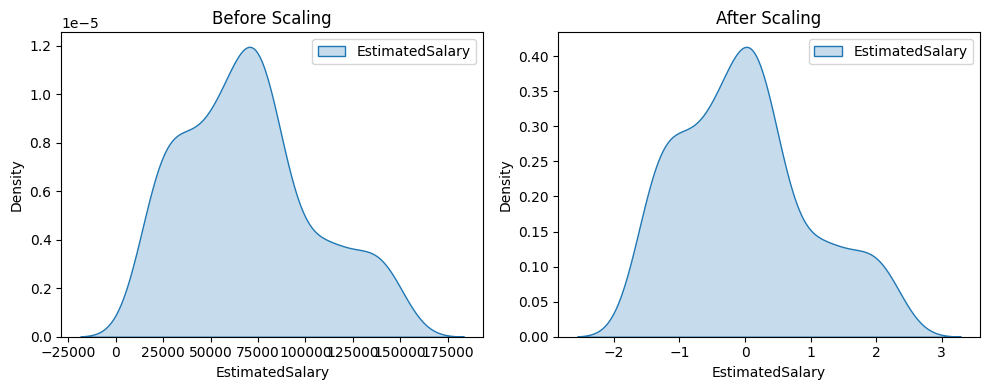

In [12]:
# making comparison of distributors
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# before scaling
sns.kdeplot(x_train['EstimatedSalary'], ax=axes[0], label='EstimatedSalary', fill=True)
axes[0].set_title("Before Scaling")
axes[0].legend()   # ✅ Add legend for left subplot

# after scaling
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=axes[1], label='EstimatedSalary', fill=True)
axes[1].set_title("After Scaling")
axes[1].legend()   # ✅ Add legend for right subplot

plt.legend()
plt.tight_layout()
plt.show()

## Why scaling is important ???

In [13]:
# now we will be training the model one over normal values and another using logistic regression to know why scaling is always a better option

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg_scaled = LogisticRegression()

reg.fit(x_train, y_train)
reg_scaled.fit(x_train_scaled, y_train)

y_pred = reg.predict(x_test)
y_pred_scaled = reg_scaled.predict(x_test_scaled)

# finding the accuracy of both the scaled and unscaled data sets
print(f"ACTUAL (UNSCALED) : {np.round(accuracy_score(y_test, y_pred), 2)*100} %")
print(f"PREDICTED (SCALED) : {np.round(accuracy_score(y_test, y_pred_scaled), 2)*100} %")

# SCALED VALUE ALWAYS GIVES MORE ACCURACY THEN THE ACTUAL DATA, BUT SOMEHOW ITS GIVING LESS ACCUARAY THAN THE ORIGINAL DATA


ACTUAL (UNSCALED) : 88.0 %
PREDICTED (SCALED) : 87.0 %


In [14]:
# decision tree is something where scaling has no effect, gives the same output
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()


dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

print(f"ACTUAL : {accuracy_score(y_test, y_pred)}")
print(f"SCALED : {accuracy_score(y_test, y_pred_scaled)}")


ACTUAL : 0.875
SCALED : 0.8666666666666667


## Effect of Outliers

In [15]:
# adding some outliers manually to know how the outlier affects the output
outliers = pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})

# combine with original df
df = pd.concat([df, outliers], ignore_index=True)

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

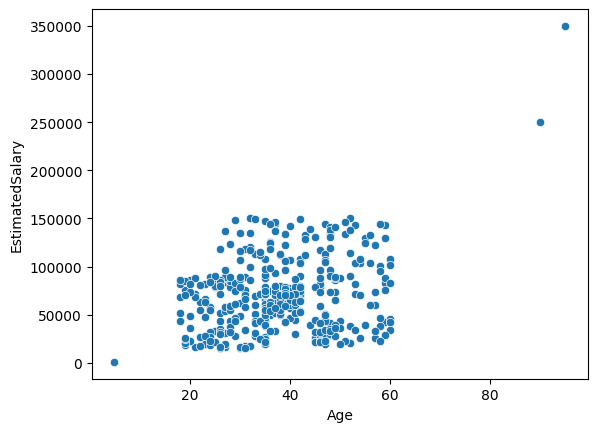

In [16]:
sns.scatterplot(df, x='Age', y='EstimatedSalary')       
# you can clearly see the outliers in the diagram below

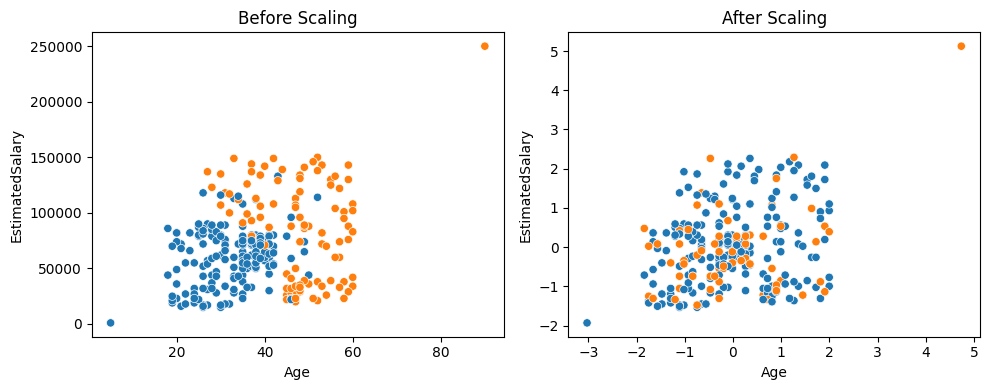

In [17]:
# lets apply standardization here and see, what happens to the output

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

# x_train.shape, x_test.shape

# using standardization
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_sscaled = scaler.transform(x_test)

# scaling
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


# using kdeplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.scatterplot(data=x_train, x='Age', y='EstimatedSalary', ax=axes[0], hue=df['Purchased'], legend=False)
axes[0].set_title("Before Scaling")
# Purchased -- 0 (blue), 1 (orange)

sns.scatterplot(data=x_train_scaled, x='Age', y='EstimatedSalary', ax=axes[1], hue=df['Purchased'], legend=False)
axes[1].set_title("After Scaling")



plt.tight_layout()
plt.show()



WHEN TO USE STANDARDIZATION, BELOW ARE SOME EXAMPLES

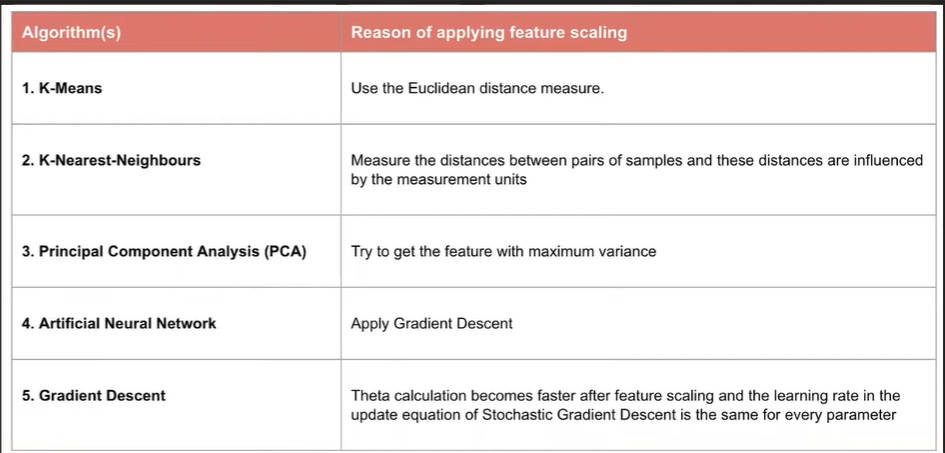